In [ ]:
class LinearRegression():
  def __init__(self):
    self.a = 0
    self.b = 0
    pass

  def fit(self, X, y):
    sumX = 0
    sumY = 0
    meanX = 0
    meanY = 0
    sumofX_and_Xmean_andY = 0
    sumofX_andXmean_squared = 0
    for val in X:
      sumX +=val
    for val in y:
      sumY +=val
    meanX = sumX/len(X)
    meanY = sumY/len(y)
    for val in X:
      sumofX_andXmean_squared +=(val - meanX)**2
    # for i in range(len(X)):
    #   sumofX_and_Xmean_andY += (X[i]-meanX)*(y[i]-meanY)
    for x_val, y_val in zip(X, y):  # Use .values to get NumPy arrays for indexing
        sumofX_and_Xmean_andY += (x_val - meanX) * (y_val - meanY)

    self.b = sumofX_and_Xmean_andY/sumofX_andXmean_squared
    self.a = meanY - self.b*meanX

  def predict(self, val):
    return self.a + self.b*val

In [ ]:
class MeanSquaredError():

  def __init__(self, y_test, y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    self.mse = np.mean((y_test - y_pred) ** 2)

  def get_mse(self):
    return self.mse

In [ ]:
! kaggle datasets download abhishek14398/salary-dataset-simple-linear-regression
! unzip salary-dataset-simple-linear-regression.zip

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.12MB/s]
Archive:  salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


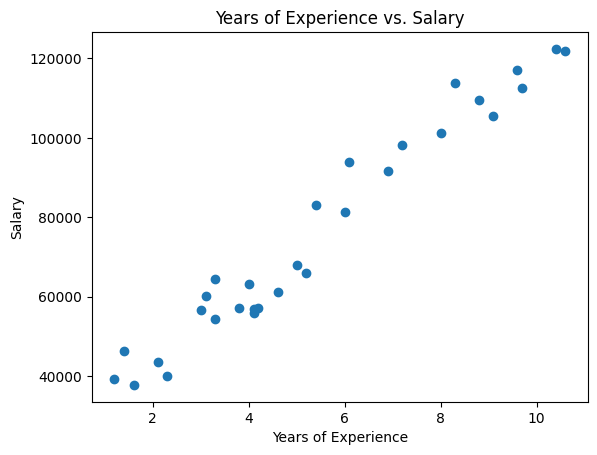

In [ ]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.show()

In [ ]:
# Uncomment these lines if you want to manually divide data into train and test
# training_Data = data[:20]
# testing_data =data[20:]
# X_train = training_Data.YearsExperience
# y_train = training_Data.Salary
# X_test = testing_data.YearsExperience
# y_test = testing_data.Salary

# Comment the following lines if you have uncommented the previous lines
from sklearn.model_selection import train_test_split
X = data['YearsExperience']
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1),y_train)

In [ ]:
y_pred=model.predict(X_test)

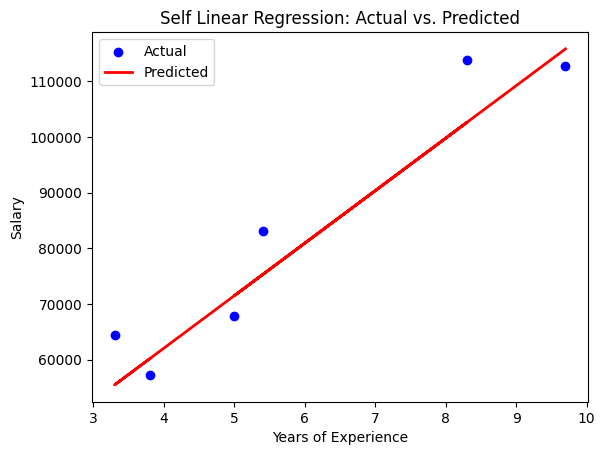

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Self Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [ ]:
mse=MeanSquaredError(y_test, y_pred)
print(f"MeanSquaredError: {mse.get_mse()}")

MeanSquaredError: 49830096.855908215


<function matplotlib.pyplot.show(close=None, block=None)>

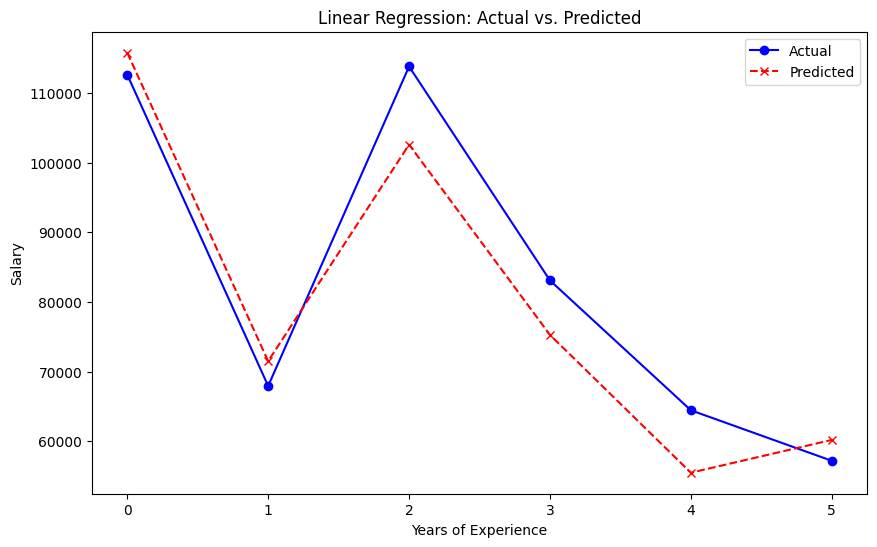

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values.reshape(-1, 1), label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(y_pred.values.reshape(-1, 1), label='Predicted', marker='x', linestyle='--', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show

In [ ]:
# Comparing Results to Sk-learn's Linear Regression model
from sklearn.linear_model import LinearRegression as lr
model1 = lr()
# Reshape X_train to a 2D array using .values.reshape(-1, 1)
model1.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(X_test.values.reshape(-1, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

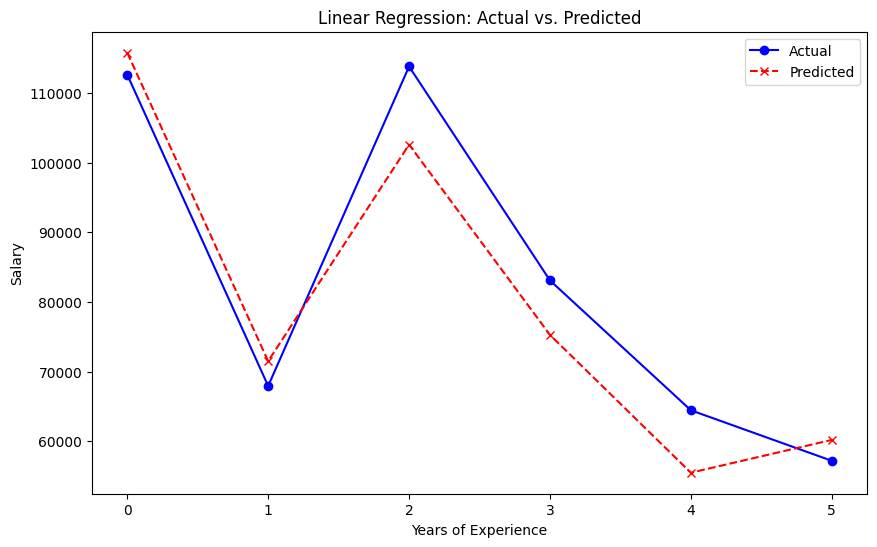

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values.reshape(-1, 1), label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(y_pred1, label='Predicted', marker='x', linestyle='--', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show